# Tasks
1. We saw the different types of research questions in the lecture. Formulate a research
question for the available dataset. What type of research question is it?
2. Load the file demographics.txt. This file contains information about the patients /
subjects. Text files (.txt) can be loaded using read.table() in R and open() in Python.
3. How many features are there? What’s the dimensionality of the dataset?
4. What are the types of the different features? (numerical / categorical)
5. Give a summary (min, max, mean, etc.) of the dataset and plot the distributions of the
existing features. Are there any outliers in any of the features?
6. Are there any missing values? Note that the missing values in the dataset are
represented by NaN. In R, for instance, they should be represented as NA.
7. What type of missing values, if any? (optional)
8. Perform data imputation of missing values (if any) using:
a. The mean of the features
b. kNN or another approach of your choice
In Python, imputation can be performed using the Impyute library. Two common packages
used in R to impute missing values is MICE and missForest.
9. What types of transformations would you recommend for this dataset? Why?
10. Load the gait signals contained in the .txt files (Pt: patient, Co: healthy controls). Plot
an example.
11. What types of features can you extract from the signals, and can be useful for the task
at hand?

**1. We saw the different types of research questions in the lecture. Formulate a research question for the available dataset. What type of research question is it?**

Research questions: 
   1. Does an equivalent expression of Parkinson's disease lead to stronger symptoms (regarding running speed and total force under the feet) in women than in men?
   2. Does an equivalent expression of Parkinson's disease lead to different burdening of the feet when walking (regarding sensor values under the feet) in women than in men?

Reformulating these for prediction: 
Can we predic the gender of a equivalent expression of Parkinson's disease 
   1. Can we predict the gender of similarly sick patients based on of the expression of Parkinson's disease (regarding running speed and total force under the feet)?
   2. Can we predict the gender of similarly sick patients based on the different burdening of the feet when walking (regarding sensor values under the feet)?

Both of these question can be judged as explorative research questions, as we try to find a correlation between features (gender and severity of the disease on one hand, speed and total force / sensor values on the other) to support our hypthesis. It also falls into the causal type, where the causal aspect of the question seeks to establish a causal relationship between Parkinson's disease and its symptoms in men and women. There might also be mechanistic elements to it as it tries to find gender specific differences in the symptoms of Parkinson's disease. For this work I choose research question one but might return to two if time allows it.

In [1]:
# 2. Load the file demographics.txt. This file contains information about the patients /subjects. Text files (.txt) can be loaded using read.table() in R and open() in Python.
# The usual code to read a file would be:
# with open('dataset/demographics.txt', 'r') as f:
#    text = f.read()

# I am choosing the following to make editing easier (I had to remove empty delimeters at the end of the file as they were not neceessary, this was just part of a initial clean-up and one click by using replace-all)
import pandas as pd

# Read the text file into a pandas dataframe using tabs as separator
df = pd.read_csv('../dataset/extra_information/demographics.txt', sep='\t')

# Display the dataframe
print(df)

         ID Study  Group  Subjnum  Gender  Age  Height  Weight  HoehnYahr  \
0    GaPt03    Ga      1        3       2   82    1.45    50.0        3.0   
1    GaPt04    Ga      1        4       1   68    1.71     NaN        2.5   
2    GaPt05    Ga      1        5       2   82    1.53    51.0        2.5   
3    GaPt06    Ga      1        6       1   72    1.70    82.0        2.0   
4    GaPt07    Ga      1        7       2   53    1.67    54.0        3.0   
..      ...   ...    ...      ...     ...  ...     ...     ...        ...   
161  SiCo26    Si      2       26       1   60    1.74    72.0        NaN   
162  SiCo27    Si      2       27       1   67    1.90    95.0        NaN   
163  SiCo28    Si      2       28       1   61    1.70    72.0        NaN   
164  SiCo29    Si      2       29       1   53    1.70    87.0        NaN   
165  SiCo30    Si      2       30       1   63    1.74    82.0        NaN   

     UPDRS  UPDRSM   TUAG  Speed_01  Speed_02  Speed_03  Speed_04  Speed_05

In [2]:
# 3. How many features are there? What’s the dimensionality of the dataset?
print(df.shape)
# this prints (166, 20) translating to a dimensionality of 20 x 166, which is 20 columns (the features and the target) and 166 rows. This means there is data on 166 patients.
print("As one column represents the target, there are 19 features. ID and study could be seen as only organisational and no feature and therefore there are 17 features.")

# For task 4: 
print(df.dtypes)

(166, 20)
As one column represents the target, there are 19 features. ID and study could be seen as only organisational and no feature and therefore there are 17 features.
ID            object
Study         object
Group          int64
Subjnum        int64
Gender         int64
Age            int64
Height       float64
Weight       float64
HoehnYahr    float64
UPDRS        float64
UPDRSM       float64
TUAG         float64
Speed_01     float64
Speed_02     float64
Speed_03     float64
Speed_04     float64
Speed_05     float64
Speed_06     float64
Speed_07     float64
Speed_10     float64
dtype: object


**4. What are the types of the different features? (numerical / categorical)**

- ID              object    -> categorical
- Study           object    -> categorical
- Group            int64    -> numerical
- Subjnum          int64    -> numerical
- Gender           int64    -> numerical (was categorical male/female but transformed to numerical 1/2)
- Age              int64    -> numerical
- Height         float64    -> numerical
- Weight         float64    -> numerical
- HoehnYahr      float64    -> numerical
- UPDRS          float64    -> numerical
- UPDRSM         float64    -> numerical
- TUAG           float64    -> numerical
- Speed_01       float64    -> numerical
- Speed_02       float64    -> numerical
- Speed_03       float64    -> numerical
- Speed_04       float64    -> numerical
- Speed_05       float64    -> numerical
- Speed_06       float64    -> numerical
- Speed_07       float64    -> numerical
- Speed_10       float64    -> numerical

This can also be checked manually by seeing which features have numerical values and which don't (categorical)

            Group     Subjnum      Gender         Age      Height      Weight  \
count  166.000000  166.000000  166.000000  166.000000  163.000000  163.000000   
mean     1.439759   16.469880    1.409639   65.138554   57.634233   72.558282   
std      0.497860    9.549663    0.493255    9.200070   78.790179   12.095861   
min      1.000000    1.000000    1.000000   36.000000    1.450000   47.000000   
25%      1.000000    8.250000    1.000000   59.000000    1.655000   64.000000   
50%      1.000000   16.000000    1.000000   65.000000    1.740000   72.000000   
75%      2.000000   23.750000    2.000000   71.000000  160.000000   80.000000   
max      2.000000   40.000000    2.000000   86.000000  185.000000  105.000000   

        HoehnYahr       UPDRS      UPDRSM        TUAG    Speed_01   Speed_02  \
count  111.000000  135.000000  135.000000  153.000000  165.000000  53.000000   
mean     1.891892   21.466667   13.177778   10.918235    1.125345   1.124094   
std      0.892915   17.571942 

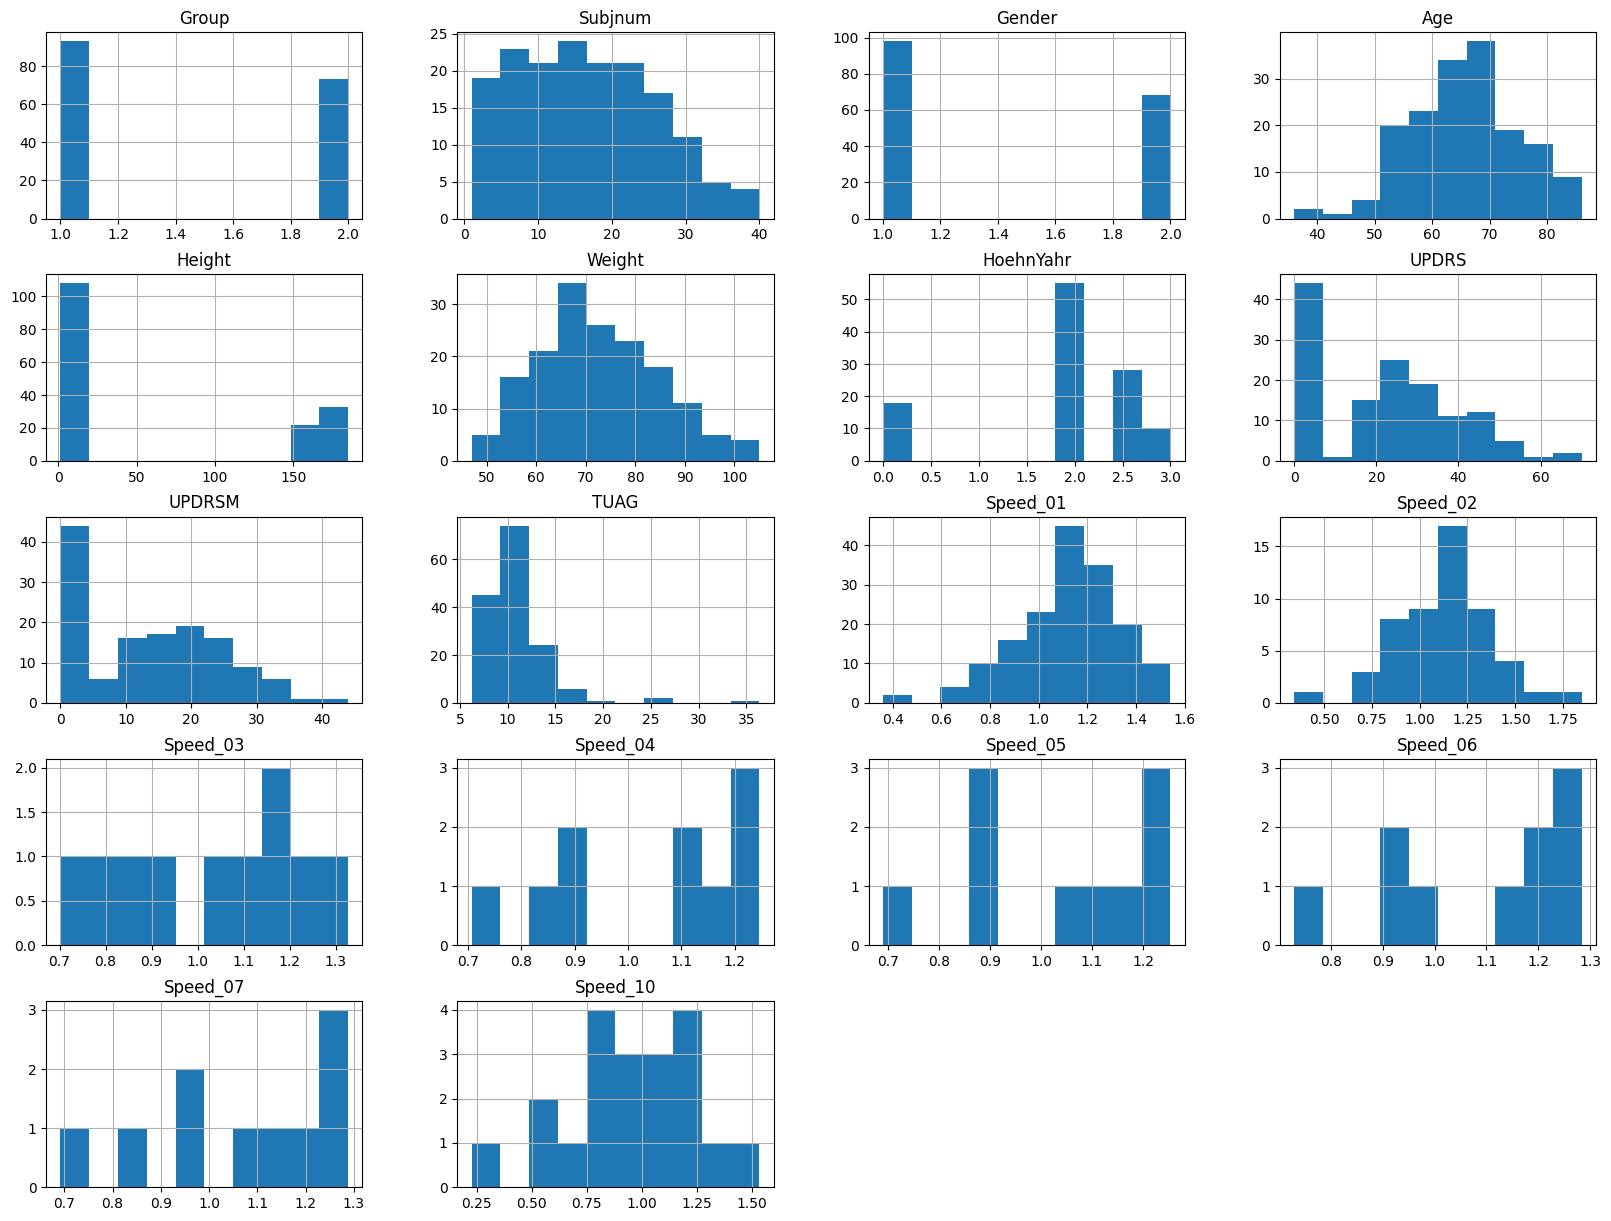

In [3]:
# 5. Give a summary (min, max, mean, etc.) of the dataset and plot the distributions of the existing features. Are there any outliers in any of the features?
import matplotlib.pyplot as plt

# Print summary statistics of the dataset using pandas describe function
# 25% is the lower quartile, 50% is the median, and 75% is the upper quartile.
# std - standard deviation
print(df.describe())

# Plot the distributions of numerical features with a histogram, using pandas built-in hist() function; there is alterantively a plot function
df.hist(bins=10, figsize=(20,15))
plt.show()

Outliers: 
- *Speed_01* has a total count of 165, *Speed_02* only 53 and the others only 10 which likely is due to many missing values (NAN = not a number, undefined data) in Speed_03 and upwards.
- Looking at the *height*, we have a minimum of 1.45 and a maximum of 185. Checking against the dataset this shows that some of the patients' height was given in cm and some in m.
- The mean of the *UPDRS* is only around 21, whilst the maximum here is 70. This points to some cases being way worse than the average.
- The lower *age* values could be seen as outliers as we have a minimum of 36 but even the 25th percentile is already at 59; However, Parkinson is more common in older patients so this is no surprise.
- With the disease metrics, there could be some parts seen as outliers. 
  - *TUAG* (Timed Up and Go) is all somewhat in the same range but for some it is not, but this is a very patient specific value and highly dependant on the person so 'outliers' might just struggle more with the task at hand.
  - The other three have some higher amounts of `0` values, but these point to the healthy patients and, too, are expected.

In [4]:
# 6. Are there any missing values? Note that the missing values in the dataset are represented by NaN. In R, for instance, they should be represented as NA.
# This first print-statement prints True if there are values missing
print(df.isnull().any().any())

# This statement prints a list of all columns and the sum of missing values in each
print(df.isnull().sum())

# Yes, there are values missing, see next block

True
ID             0
Study          0
Group          0
Subjnum        0
Gender         0
Age            0
Height         3
Weight         3
HoehnYahr     55
UPDRS         31
UPDRSM        31
TUAG          13
Speed_01       1
Speed_02     113
Speed_03     156
Speed_04     156
Speed_05     156
Speed_06     156
Speed_07     156
Speed_10     146
dtype: int64


*7. What type of missing values, if any? (optional)*

It is hard to determine the type of missing values based solely on the data-results without more info on the specific way the data was won. With all the values missing for *Speed_03* to *Speed_07* for most of the tests, it looks like they miss in a monotone pattern. I could imagine those were not tested in all iterations (due to patients energy or similar constraints) which would make the missing values not random (MNAR) or, less likely, the sensors didn't always pick up the data properly which would make them missing somewhat at random (MAR) as in both cases we know the reason but with sensor errors we can not know how or when they were triggered.

Any of the disease metrics missing (*HoehnYahr*, *UPDRS*, *UPDRSM*, *TUAG*) are not missing completely random as there is always at least one known for each patient so there is some kind of correlation. They could be MAR or MNAR depending on how to someone judges this.

The missing *height*, *weight* and *Speed_01* do not have any (for me) visible pattern, therefore I would judge them completely random.

In [5]:
# performing the normalisation of the height for the dataset to make the filling of nan values more accurate (reasoning in task 9)

for index, value in df['Height'].items():
    if value > 2.5:
        df.at[index, 'Height'] = value / 100


In [6]:
# 8. Perform data imputation of missing values (if any) using:
# I am using Pandas and scikit-learn for the imputation
# a. The mean of the features

#this array is only needed for b.
numerical_columns=[]

imputed_data_mean = df.copy()
for column in df.columns:
    # check if column is numeric
    if imputed_data_mean[column].dtype != 'object': # and 'Speed' not in column: I originally did not want to impute speed values (see next task for reasoning) but it is needed for task 2 so I am imputing too
        numerical_columns.append(column)
        imputed_data_mean[column] = imputed_data_mean[column].fillna(imputed_data_mean[column].mean())
print(imputed_data_mean.tail())
imputed_data_mean.to_csv('imputed_data_mean.csv', index=False)

         ID Study  Group  Subjnum  Gender  Age  Height  Weight  HoehnYahr  \
161  SiCo26    Si      2       26       1   60    1.74    72.0   1.891892   
162  SiCo27    Si      2       27       1   67    1.90    95.0   1.891892   
163  SiCo28    Si      2       28       1   61    1.70    72.0   1.891892   
164  SiCo29    Si      2       29       1   53    1.70    87.0   1.891892   
165  SiCo30    Si      2       30       1   63    1.74    82.0   1.891892   

         UPDRS     UPDRSM   TUAG  Speed_01  Speed_02  Speed_03  Speed_04  \
161  21.466667  13.177778   9.20      1.00  1.124094    1.0342    1.0444   
162  21.466667  13.177778  12.52      1.12  1.124094    1.0342    1.0444   
163  21.466667  13.177778  12.65      0.99  1.124094    1.0342    1.0444   
164  21.466667  13.177778  11.41      1.29  1.124094    1.0342    1.0444   
165  21.466667  13.177778   8.68      1.42  1.124094    1.0342    1.0444   

     Speed_05  Speed_06  Speed_07  Speed_10  
161    1.0446    1.0769     1.072 

In [7]:
#b. kNN (using the 3 nearest neighbours)
from sklearn.impute import KNNImputer

imputed_data_knn_filtered = df.copy()
imputed_data_knn_filtered = imputed_data_knn_filtered[numerical_columns]
imputer = KNNImputer(n_neighbors=3)

values_imputed = imputer.fit_transform(imputed_data_knn_filtered)

df_updated = pd.DataFrame(values_imputed , columns = numerical_columns)
imputed_data_knn = df.copy()

# Merge the filled dataframe back into the original
for column in df_updated:
    imputed_data_knn[column] = df_updated[column]

print(imputed_data_knn.tail())
imputed_data_knn.to_csv('imputed_data_knn.csv', index=False)


         ID Study  Group  Subjnum  Gender   Age  Height  Weight  HoehnYahr  \
161  SiCo26    Si    2.0     26.0     1.0  60.0    1.74    72.0   1.333333   
162  SiCo27    Si    2.0     27.0     1.0  67.0    1.90    95.0   2.166667   
163  SiCo28    Si    2.0     28.0     1.0  61.0    1.70    72.0   2.000000   
164  SiCo29    Si    2.0     29.0     1.0  53.0    1.70    87.0   2.000000   
165  SiCo30    Si    2.0     30.0     1.0  63.0    1.74    82.0   2.166667   

         UPDRS     UPDRSM   TUAG  Speed_01  Speed_02  Speed_03  Speed_04  \
161   0.000000   0.000000   9.20      1.00  1.386333  1.237000  1.230333   
162  22.666667  11.666667  12.52      1.12  1.155000  1.110333  1.102000   
163  21.666667  15.666667  12.65      0.99  1.386333  1.248000  1.216000   
164  13.666667  10.666667  11.41      1.29  1.042000  1.220667  1.210333   
165  34.000000  23.666667   8.68      1.42  1.092333  1.220667  1.210333   

     Speed_05  Speed_06  Speed_07  Speed_10  
161  1.244667  1.263667  1.2

**9. What types of transformations would you recommend for this dataset? Why?**

The base data on the patients general information is fully provided (gender, age, etc.) and the categorical variables are already encoded numerically (aside of the study and patient-ID, both of which are just organisational in nature) so there needn't any changes on that front. The height should be normalized (either cm or m) if it is to be properly useable (done already above). Transformations regarding other features that focus on missing values here are difficult. Whilst I think filling the NaN values for the features of *weight*, *height*, *age*, etc would make sense, I am unsure about whether or not filling the *HoehnYahr*, *UPDRS*, *UPDRSM* and *TUAG* columns does. They define the severity of the sickness and filling these with wrong values can lead to wrong conclusions if not done correctly and that can barely be defined with the basic knowledge I have. I am also divided about filling the speed columns as these seem to mostly be deliberately not measured since not every patient could do the same experiments, but might be useful to impute using kNN for the same reason. 

So, imputating features of column 9 and upwards, I personally would like to try to find a conclusion that does not need any filling up first. If that is not possible, I would pick an algorithm such as kNN to try and keep the correlation between the other values.

It might also make sense to make an ordinal encoding on the study column in case the study environment also impacted the results.

As for transformations for new features, the speed values might be used to generate the min / max amplitude, mean, and similar to make the values more easily comparable. The normalization provided by the amplitude might help facilitate a fair comparison and understanding of the speed differences among the test persons without having to check each separate value.

In [8]:
# 10. Load the gait signals contained in the .txt files (Pt: patient, Co: healthy controls). Plot an example.
import os
from pprint import pprint

directory = '../dataset/'

# Get a list of all files in the directory
files = os.listdir(directory)
connected_files = []

for file in files:
    if not 'txt' in file:
        continue
    
    data_id = file.split('_')[0]
    connected_file = []

    # Map connected files to each other
    counter = 1
    while True:
        formatted_counter = "{:02d}".format(counter)
        built_file = f"{data_id}_{formatted_counter}.txt"
        if built_file in files:
            connected_file.append(built_file)
        else:
            connected_files.append(connected_file)
            break

        counter += 1

pprint(connected_files)

[['GaPt15_01.txt', 'GaPt15_02.txt'],
 ['JuPt03_01.txt',
  'JuPt03_02.txt',
  'JuPt03_03.txt',
  'JuPt03_04.txt',
  'JuPt03_05.txt',
  'JuPt03_06.txt',
  'JuPt03_07.txt'],
 ['JuPt10_01.txt',
  'JuPt10_02.txt',
  'JuPt10_03.txt',
  'JuPt10_04.txt',
  'JuPt10_05.txt',
  'JuPt10_06.txt',
  'JuPt10_07.txt'],
 ['GaPt31_01.txt', 'GaPt31_02.txt'],
 ['GaPt32_01.txt', 'GaPt32_02.txt'],
 ['JuPt01_01.txt',
  'JuPt01_02.txt',
  'JuPt01_03.txt',
  'JuPt01_04.txt',
  'JuPt01_05.txt',
  'JuPt01_06.txt'],
 ['SiPt08_01.txt'],
 ['JuPt28_01.txt',
  'JuPt28_02.txt',
  'JuPt28_03.txt',
  'JuPt28_04.txt',
  'JuPt28_05.txt',
  'JuPt28_06.txt',
  'JuPt28_07.txt'],
 ['JuPt10_01.txt',
  'JuPt10_02.txt',
  'JuPt10_03.txt',
  'JuPt10_04.txt',
  'JuPt10_05.txt',
  'JuPt10_06.txt',
  'JuPt10_07.txt'],
 ['GaCo09_01.txt', 'GaCo09_02.txt'],
 ['GaCo10_01.txt', 'GaCo10_02.txt'],
 ['SiPt07_01.txt'],
 ['GaPt22_01.txt', 'GaPt22_02.txt'],
 ['GaPt16_01.txt', 'GaPt16_02.txt'],
 ['JuCo14_01.txt'],
 ['GaPt18_01.txt', 'GaPt18_02.

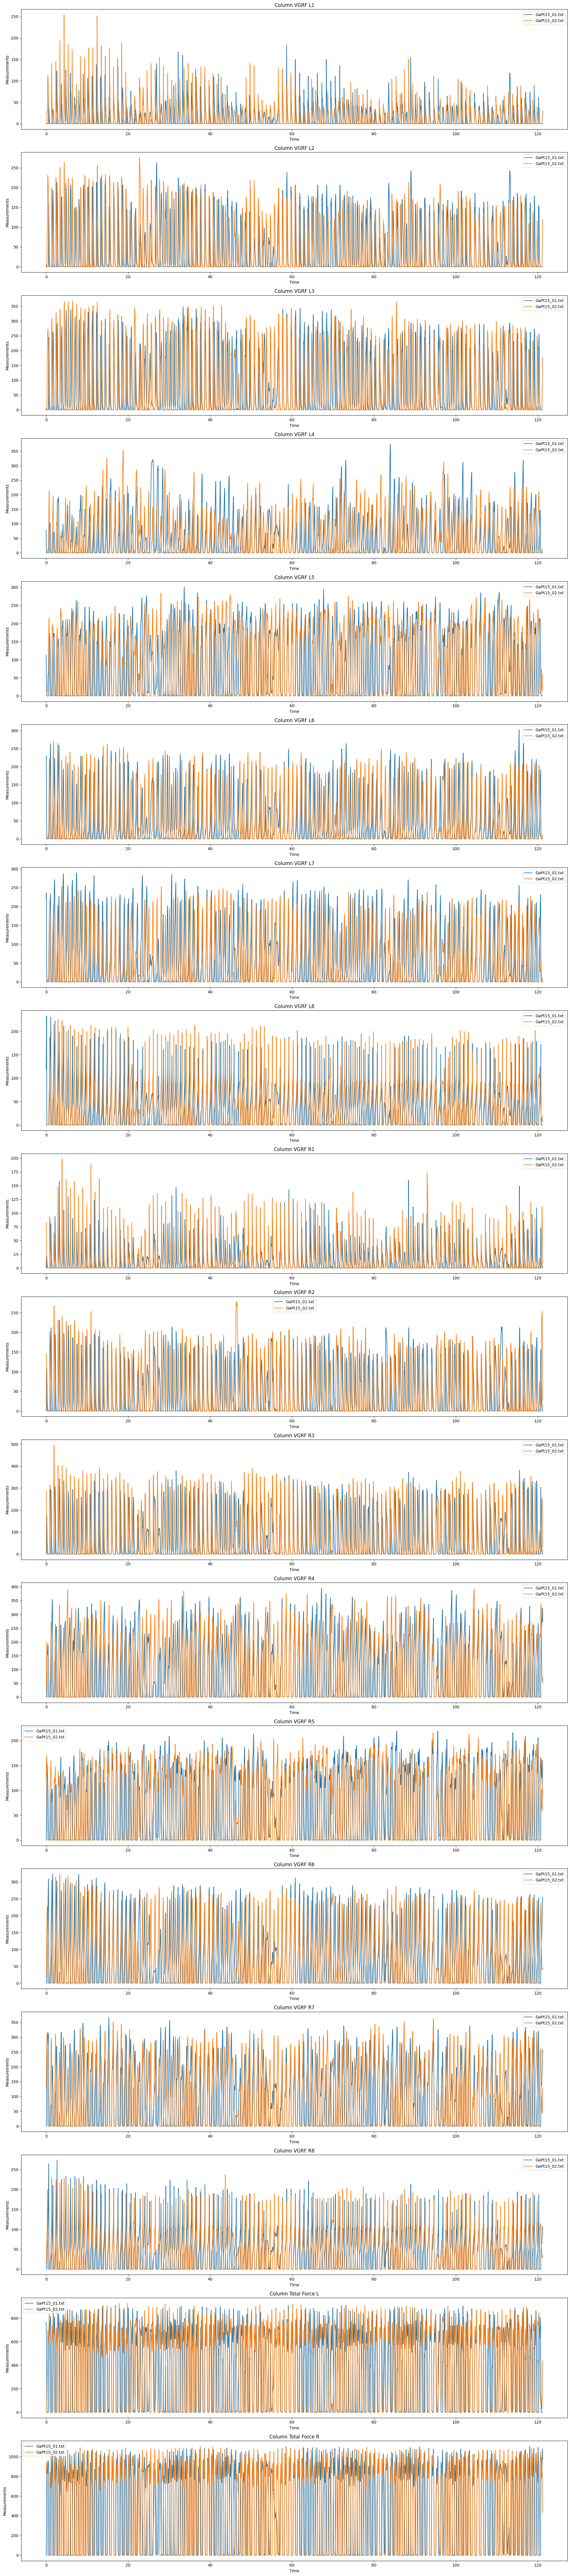

In [9]:
# For the demonstration, we plot only the first list of txt files as it otherwise gets hard to see anything
# Move all connected lists into one DataFrame
lists = connected_files[0]

# read in files as dataframes and create one plot for each column in each file
# plotting all in one is barely readable
dfs = []
for path in lists:
    df = pd.read_csv(directory + path, sep="\t", header=None)
    
    # define names according to format.txt
    df.columns = ['Time', 'VGRF L1', 'VGRF L2', 'VGRF L3', 'VGRF L4', 'VGRF L5', 'VGRF L6', 'VGRF L7', 'VGRF L8', 'VGRF R1', 'VGRF R2', 'VGRF R3', 'VGRF R4', 'VGRF R5', 'VGRF R6', 'VGRF R7', 'VGRF R8', 'Total Force L', 'Total Force R']
    dfs.append(df)

# here, I am assuming all files have same number of columns
num_cols = dfs[0].shape[1] - 1  

fig, axs = plt.subplots(num_cols, 1, figsize=(20, 5*num_cols))
axs = axs.flatten()  # convert axs to a 1D array

# plot the data
for i in range(1, num_cols + 1):
    legend = []

    for j in range(len(lists)):
        df = dfs[j]
        x = df.iloc[:, 0]
        y = df.iloc[:, i]
        axs[i-1].plot(x, y)
        axs[i-1].set_title(f"Column {df.columns[i]}")
        axs[i-1].set_xlabel("Time")
        axs[i-1].set_ylabel(f"Measurements")
        legend.append(f"{lists[j]}")

    axs[i-1].legend(legend)    
plt.tight_layout()
plt.show()

**11. What types of features can you extract from the signals, and can be useful for the task at hand?**

The values per column are explained as the following:

Column      1:   Time (in seconds)  
Columns   2-9:   Vertical ground reaction force (VGRF, in Newton) on each of 8  
	  	  sensors located under the left foot  
Columns 10-17:   VGRF on each of the 8 sensors located under the right foot  
Column     18:   Total force under the left foot  
Column     19:   Total force under the right foot.  

So the features we already have are the current time in the experiment, the vertical ground reaction force as well as the total force of the left and right foot at this particular time.

Without any transformation, relevant for my first research question would be column 18 and 19, as they address the total force under the patients feet. Additionally, from the demographics file the data on Gender, Walking speed and Disease severity (either some or all of the measurements) is needed. As for the second research question, the columns 2-17 would be needed as they show how each foot is burdened. Additionally, the Gender and Disease metrics of sick patients is needed.

Using the features from above, there are other features that can be extracted from them, such as minimal, maximal, mean or the median values of the ground force and sensor values which might make those easier to work with and also give a good initial overview on the used forces. Additionally, a min-max range could turn out to be useful again, too, as it makes comparisons a lot more direct. 

For answering my own (second) question, I propose to enhance the data from the demographics dataset with the averages and median of each of the signal features of the respective patients. Additionally, I'd like to add the minimal and maximal values as well as a min-max range (`max - min`) as I think these provide some insight in the extreme values or peaks and a summary measure of the overall variation or spread in the burdening of the feet. Overall, these four features (per signal feature) should nicely display all relevant information in a overseeable way. As it is not completely clear to me what the numbering of the signal files means, I will only use _01 files.

Not checking my own questions, I also propose the inclusion of a new feature that indicates the transition of the main weight from the heel to the front of the feet. As we walk, the shift of weight from the heel to the front is a natural movement that may vary from patient to patient. By monitoring the VGRF values captured by the sensors located under the feet, we can identify anomalies in this weight shift pattern. To achieve this, I suggest defining thresholds for each sensor to determine if it currently supports the main bodyweight. This involves establishing specific criteria based on the VGRF values, such as minimum values or relative percentages. As I do not have enough knowledge, I cannot give exact values for these. I recommend adding two additional columns to the dataset, one for when the weight focuses on the front foot and another for the back foot.

For each foot focus column, we can determine which sensors, at a minimum, need to surpass the established threshold to indicate that the weight is concentrated on the respective area. We can then represent this information using binary values, where '1' indicates the focus on the corresponding foot area and '0' indicates otherwise. For intermediate status, when the actual shift happens, a third feature might be suitable that displays whether or not the foot is currently shifting (e.g., "0" for no shift, "1" for shifting). This resembles a one-hot encoding and could be also displayed all in one column / feature if an ordinal encoding is used.